# Final Portofolio task 4.10 1.2

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
6. Create an appropriate visualization to show the distribution of profiles.
7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
9. Produce suitable charts to illustrate your results and export them in your project folder.
10. Tidy up your script, export your final data set, and save your notebook.

## 1. import libraries, data, and check data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/jazmingutierrez/DEC2023 Instacart Basket Analysis'

In [3]:
df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_exclusions_high.pkl'))

In [4]:
# Check dataframe 
pd.set_option('display.max_columns', None)
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spender,spender_flag,average_spend,Customer_frequency,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,merged,Region,Exclusion flag
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer


In [5]:
df_all.shape

(30992664, 35)

## 5. Customer Profiling 
Create profile variable based on age, income, goods from department_column, number of dependents. 


### Age: 
Elder,
Adult,
Young Adult,

In [6]:
# look for stats in age 
df_all.agg({'Age': ['mean', 'max']})

,Age
mean,49.467933
max,81.000000


Elder= >=65, 65< Adult and Adult >=40, Young Adult <40

In [7]:
# create Age_Group

In [8]:
df_all.loc[df_all['Age'] >=65, 'Age Group'] = 'Elder'
df_all.loc[(df_all['Age']<65) & (df_all['Age']>= 40), 'Age Group'] = 'Adult'
df_all.loc[df_all['Age']< 40, 'Age Group'] = 'Young Adult'

In [9]:
# Check counts
df_all['Age Group'].value_counts(dropna = False)

Age Group
Adult          12115268
Young Adult    10674650
Elder           8202746
Name: count, dtype: int64

In [10]:
# Check total count 
12115268+10674650+8202746

30992664

In [11]:
# Check dataframe 
df_all[['Age Group', 'Age']].head(20)

,Age Group,Age
0,Young Adult,31
1,Young Adult,31
2,Young Adult,31
3,Young Adult,31
4,Young Adult,31
5,Young Adult,31
6,Young Adult,31
7,Young Adult,31
8,Young Adult,31
9,Young Adult,31


In [12]:
df_all[['Age Group', 'Age']].tail(60)

,Age Group,Age
32434138,Adult,52
32434139,Adult,52
32434140,Adult,52
32434141,Adult,52
32434142,Adult,52
32434143,Adult,52
32434144,Adult,52
32434145,Adult,52
32434146,Adult,52
32434151,Elder,69


### Variable Based on Income

low, mid, high

In [13]:
# look for stats in income
df_all['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

In [14]:
df_all.loc[df_all['income'] >=128101, 'Income Category'] = 'High Income'


In [15]:
df_all.loc[(df_all['income']<128101) & (df_all['income']>= 96765), 'Income Category'] = 'Middle Income'


In [16]:
df_all.loc[(df_all['income']< 96765) & (df_all['income']>= 67289), 'Income Category'] = 'Low Income'


In [17]:
df_all.loc[df_all['income'] < 67289, 'Income Category'] = 'Lowest Income'

In [18]:
# Check counts
df_all['Income Category'].value_counts(dropna = False)

Income Category
Low Income       7748589
Middle Income    7748353
High Income      7748266
Lowest Income    7747456
Name: count, dtype: int64

In [19]:
# check counts total 
7748589+7748353+7748266+7747456

30992664

In [20]:
# Check dataframe 
df_all[['Income Category', 'income']].tail(60)

,Income Category,income
32434138,Lowest Income,37731
32434139,Lowest Income,37731
32434140,Lowest Income,37731
32434141,Lowest Income,37731
32434142,Lowest Income,37731
32434143,Lowest Income,37731
32434144,Lowest Income,37731
32434145,Lowest Income,37731
32434146,Lowest Income,37731
32434151,Middle Income,103023


### Number of dependants Variable 

In [21]:
df_all['n_dependants'].describe()

count    3.099266e+07
mean     1.501798e+00
std      1.118902e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [22]:
e

In [23]:
# Check counts
df_all['Dependants Category'].value_counts(dropna = False)

Dependants Category
Dependants      23245632
No Depndants     7747032
Name: count, dtype: int64

In [24]:
# Check count total
23245632+7747032


30992664

In [25]:
# Check dataframe 
df_all[['Dependants Category', 'n_dependants']].head(60)

,Dependants Category,n_dependants
0,Dependants,3
1,Dependants,3
2,Dependants,3
3,Dependants,3
4,Dependants,3
5,Dependants,3
6,Dependants,3
7,Dependants,3
8,Dependants,3
9,Dependants,3


### Creating profile Categories (fam_status, Dependants Category, Income Category) = Customer Family Type 
1. Married, Depnedants, lowest income
2. Married, Dependants, low income
3. Married, Dependants, Middle income
4. Married, Dependants, High income
1. Single, lowest income
2. Single, low income
3. Single, Middle income
4. Single,  High income

In [26]:
df_all.loc[(df_all['fam_status']== 'married') & (df_all['Dependants Category']== 'Dependants') &(df_all['Income Category']== 'Lowest Income'), 'Customer Family Type'] = 'Married, Dependants, Lowest Income'

In [27]:
df_all.loc[(df_all['fam_status']== 'married') & (df_all['Dependants Category']== 'Dependants') &(df_all['Income Category']== 'Low Income'), 'Customer Family Type'] = 'Married, Dependants, Low Income'

In [28]:
df_all.loc[(df_all['fam_status']== 'married') & (df_all['Dependants Category']== 'Dependants') &(df_all['Income Category']== 'Middle Income'), 'Customer Family Type'] = 'Married, Dependants, Middle Income'

In [29]:
df_all.loc[(df_all['fam_status']== 'married') & (df_all['Dependants Category']== 'Dependants') &(df_all['Income Category']== 'High Income'), 'Customer Family Type'] = 'Married, Dependants, High Income'

In [30]:
df_all.loc[(df_all['fam_status']== 'single') &(df_all['Income Category']== 'Lowest Income'), 'Customer Family Type'] = 'Single, Lowest Income'

In [31]:
df_all.loc[(df_all['fam_status']== 'single') &(df_all['Income Category']== 'Low Income'), 'Customer Family Type'] = 'Single, Low Income'

In [32]:
df_all.loc[(df_all['fam_status']== 'single') &(df_all['Income Category']== 'Middle Income'), 'Customer Family Type'] = 'Single, Middle Income'

In [33]:
df_all.loc[(df_all['fam_status']== 'single') &(df_all['Income Category']== 'High Income'), 'Customer Family Type'] = 'Single, High Income'

In [34]:
df_all.loc[(df_all['fam_status']== 'single') &(df_all['Income Category']== 'Lowest Income') & (df_all['Dependants Category'] == 'Dependants'), 'Customer Family Type'] = 'Single, Dependants, Lowest Income'

In [35]:
df_all.loc[(df_all['fam_status']== 'single') &(df_all['Income Category']== 'Low Income') & (df_all['Dependants Category'] == 'Dependants'), 'Customer Family Type'] = 'Single, Dependants, Low Income'

In [36]:
df_all.loc[(df_all['fam_status']== 'single') &(df_all['Income Category']== 'Middle Income') & (df_all['Dependants Category'] == 'Dependants'), 'Customer Family Type'] = 'Single, Dependants, Middle Income'

In [37]:
df_all.loc[(df_all['fam_status']== 'single') &(df_all['Income Category']== 'High Income') & (df_all['Dependants Category'] == 'Dependants'), 'Customer Family Type'] = 'Single, Dependants, High Income'

In [38]:
df_all.loc[(df_all['fam_status']== 'married') & (df_all['Dependants Category']== 'No Dependants') &(df_all['Income Category']== 'Lowest Income'), 'Customer Family Type'] = 'Married, No Dependants, Lowest Income'

In [39]:
df_all.loc[(df_all['fam_status']== 'married') & (df_all['Dependants Category']== 'No Dependants') &(df_all['Income Category']== 'Low Income'), 'Customer Family Type'] = 'Married, No Dependants, Low Income'

In [40]:
df_all.loc[(df_all['fam_status']== 'married') & (df_all['Dependants Category']== 'No Dependants') &(df_all['Income Category']== 'Middle Income'), 'Customer Family Type'] = 'Married, No Dependants, Middle Income'

In [41]:
df_all.loc[(df_all['fam_status']== 'married') & (df_all['Dependants Category']== 'No Dependants') &(df_all['Income Category']== 'High Income'), 'Customer Family Type'] = 'Married, No Dependants, High Income'

In [42]:
df_all['Customer Family Type'].value_counts(dropna=False)

Customer Family Type
Married, Dependants, High Income      5784241
Married, Dependants, Middle Income    5705688
Married, Dependants, Lowest Income    5151379
Married, Dependants, Low Income       5121713
nan                                   4130372
Single, Lowest Income                 1600415
Single, Low Income                    1558161
Single, Middle Income                 1007095
Single, High Income                    933600
Name: count, dtype: int64

There are no married famlies without dependents and there are no single families
with dependents. 
nan could be missing imformation from original data but are customers that are active

In [43]:
df_all[['Customer Family Type']].head()

,Customer Family Type
0,"Married, Dependants, Lowest Income"
1,"Married, Dependants, Lowest Income"
2,"Married, Dependants, Lowest Income"
3,"Married, Dependants, Lowest Income"
4,"Married, Dependants, Lowest Income"


### Creating a Profile for (fam_status and Age) Customer Age Type 

1. Married, Young Adult
2. Married, Adult
3. Married, Elder
4. Single, Young Adult
5. Single, Adult
6. Single, Elder

In [44]:
df_all.loc[(df_all['fam_status']== 'married') & (df_all['Age Group'] == 'Young Adult'), 'Customer Age Type'] = 'Married, Young Adult'

In [45]:
df_all.loc[(df_all['fam_status']== 'married') & (df_all['Age Group'] ==  'Adult'), 'Customer Age Type'] = 'Married, Adult'

In [46]:
df_all.loc[(df_all['fam_status']== 'married') & (df_all['Age Group'] == 'Elder'), 'Customer Age Type'] = 'Married, Elder'

In [47]:
df_all.loc[(df_all['fam_status']== 'single') & (df_all['Age Group'] == 'Young Adult'), 'Customer Age Type'] = 'Single, Young Adult'

In [48]:
df_all.loc[(df_all['fam_status']== 'single') & (df_all['Age Group'] == 'Adult'), 'Customer Age Type'] = 'Single, Adult'

In [49]:
df_all.loc[(df_all['fam_status']== 'single') & (df_all['Age Group']== 'Elder'), 'Customer Age Typr'] = 'Single, Elder'

In [50]:
df_all['Customer Age Type'].value_counts(dropna=False)

Customer Age Type
Married, Adult          9055095
Married, Young Adult    6529093
Married, Elder          6178833
nan                     4130372
Single, Young Adult     2662946
Single, Adult           2436325
Name: count, dtype: int64

There is mainly Married Adult age group that are customers. 

## 6. Visualizations

[Text(0.5, 0, 'Customer Profile'),
 Text(0, 0.5, 'Amount of Customers'),
 Text(0.5, 1.0, 'Customer Family Type')]

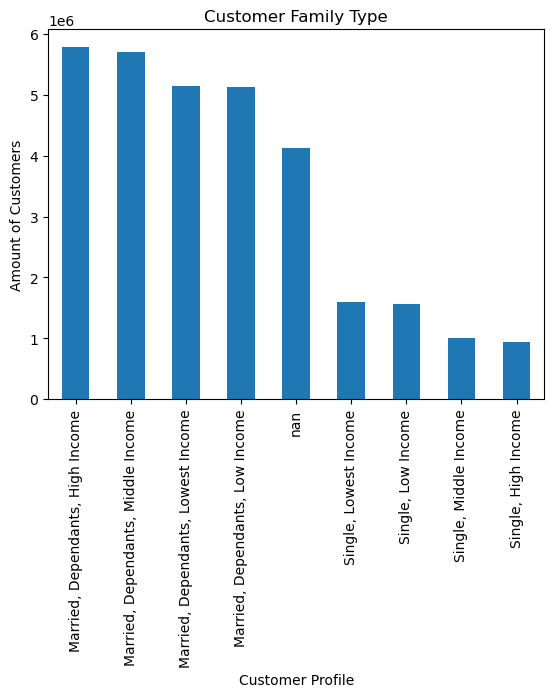

In [51]:
# Bar chart for 'Customer Family Type'
bar= df_all['Customer Family Type'].value_counts().plot.bar()
bar.set(xlabel='Customer Profile', ylabel='Amount of Customers', title='Customer Family Type')

In [52]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_family _type.png'))


[Text(0.5, 0, 'Customer Profile'),
 Text(0, 0.5, 'Amount of Customers'),
 Text(0.5, 1.0, 'Customer Age Type')]

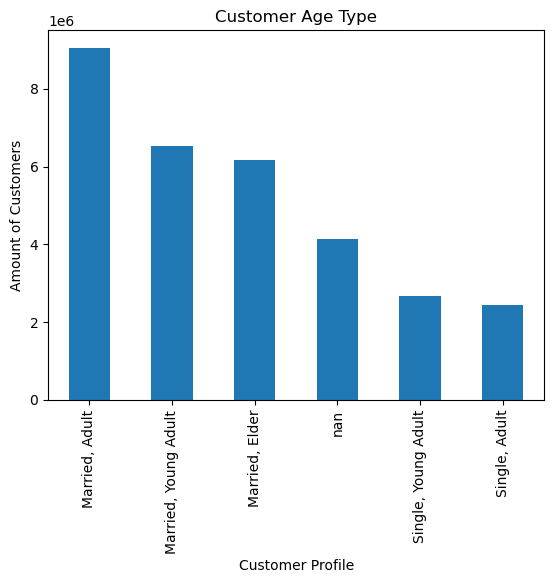

In [53]:
# Bar chart for 'Customer Age Type'
Bar_age= df_all['Customer Age Type'].value_counts().plot.bar()
Bar_age.set(xlabel='Customer Profile', ylabel='Amount of Customers', title='Customer Age Type')

In [54]:
Bar_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_type.png'))

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [55]:
# max, mean, min variables for Customer Family Type from 'days_since_prior_order' for frequency
df_all.groupby('Customer Family Type').agg({'days_since_prior_order': ['max', 'mean', 'min']})

days_since_prior_order                
                                                      max       mean  min
Customer Family Type                                                     
Married, Dependants, High Income                     30.0  10.784625  0.0
Married, Dependants, Low Income                      30.0  10.740092  0.0
Married, Dependants, Lowest Income                   30.0  10.958320  0.0
Married, Dependants, Middle Income                   30.0  10.807198  0.0
Single, High Income                                  30.0  10.682281  0.0
Single, Low Income                                   30.0  10.798180  0.0
Single, Lowest Income                                30.0  10.935974  0.0
Single, Middle Income                                30.0  10.762947  0.0
nan                                                  30.0  10.750591  0.0

In [71]:
# turn outliers to missing values 
df_all.loc[df_all['prices']>100, 'prices'] =np.nan

In [72]:
# max, mean, min variables for Customer Family Type from 'average_spend' for expenditure
df_all.groupby('Customer Family Type').agg({'prices': ['max', 'mean', 'min']})

prices               
                                      max      mean  min
Customer Family Type                                    
Married, Dependants, High Income     25.0  7.958986  1.0
Married, Dependants, Low Income      25.0  7.954586  1.0
Married, Dependants, Lowest Income   25.0  7.266599  1.0
Married, Dependants, Middle Income   25.0  7.962268  1.0
Single, High Income                  25.0  7.938404  1.0
Single, Low Income                   25.0  7.951180  1.0
Single, Lowest Income                25.0  7.426881  1.0
Single, Middle Income                25.0  7.972540  1.0
nan                                  25.0  7.805934  1.0

In [57]:
# max, mean, min variables for Customer Age Type from 'days_since_prior_order' for frequency
df_all.groupby('Customer Age Type').agg({'days_since_prior_order': ['max', 'mean', 'min']})

days_since_prior_order                
                                        max       mean  min
Customer Age Type                                          
Married, Adult                         30.0  10.857792  0.0
Married, Elder                         30.0  10.799910  0.0
Married, Young Adult                   30.0  10.790296  0.0
Single, Adult                          30.0  10.722408  0.0
Single, Young Adult                    30.0  10.896280  0.0
nan                                    30.0  10.750591  0.0

In [73]:
# max, mean, min variables for Customer Age Type from 'average_spend' for expenditure
df_all.groupby('Customer Age Type').agg({'prices': ['max', 'mean', 'min']})

prices               
                        max      mean  min
Customer Age Type                         
Married, Adult         25.0  7.796616  1.0
Married, Elder         25.0  7.799463  1.0
Married, Young Adult   25.0  7.788183  1.0
Single, Adult          25.0  7.793852  1.0
Single, Young Adult    25.0  7.783576  1.0
nan                    25.0  7.805934  1.0

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [74]:
# create pivot for customer family type in each region
region_customer_family_type = pd.crosstab(df_all['Region'], df_all['Customer Family Type'], dropna = False)


In [75]:
region_customer_family_type

Customer Family Type,"Married, Dependants, High Income","Married, Dependants, Low Income","Married, Dependants, Lowest Income","Married, Dependants, Middle Income","Single, High Income","Single, Low Income","Single, Lowest Income","Single, Middle Income",nan
Region,,,,,,,,,
Midwest,1380561,1146233,1205508,1359226,229205,372706,352825,252038,969405
Northeast,1036516,889231,908580,1023130,147721,280689,286738,161436,736027
South,1892474,1757605,1715792,1864334,314274,521996,543228,326826,1383933
West,1474690,1328644,1321499,1458998,242400,382770,417624,266795,1041007


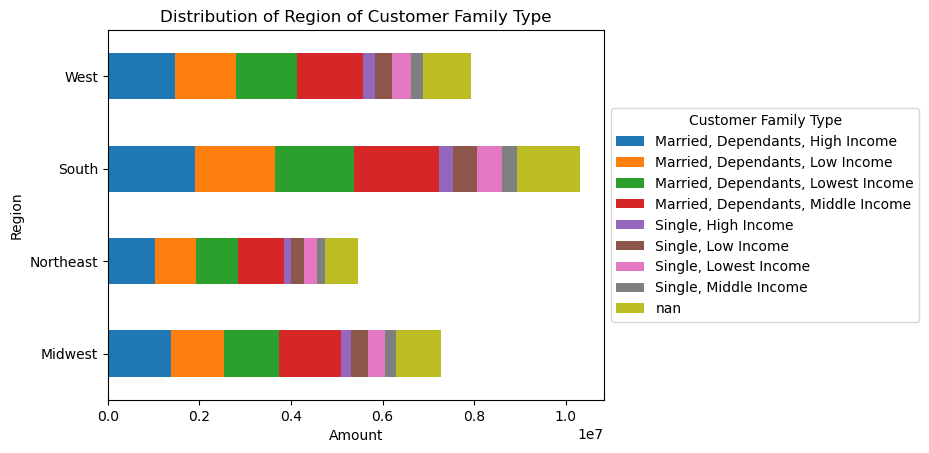

In [76]:
# Create stacked bar chart 

bar_region_customer_family_type = region_customer_family_type.plot.barh(stacked=True)

bar_region_customer_family_type.set(xlabel='Amount', ylabel='Region', title='Distribution of Region of Customer Family Type')
bar_region_customer_family_type.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Family Type')



In [77]:
# create pivot for customer age type in each region
region_customer_age_type = pd.crosstab(df_all['Region'], df_all['Customer Age Type'], dropna = False)

In [78]:
region_customer_age_type

Customer Age Type,"Married, Adult","Married, Elder","Married, Young Adult","Single, Adult","Single, Young Adult",nan
Region,,,,,,
Midwest,2139342,1434998,1517188,590388,616386,969405
Northeast,1604202,1107035,1146220,406033,470551,736027
South,2978566,2052546,2199093,799857,906467,1383933
West,2332985,1584254,1666592,640047,669542,1041007


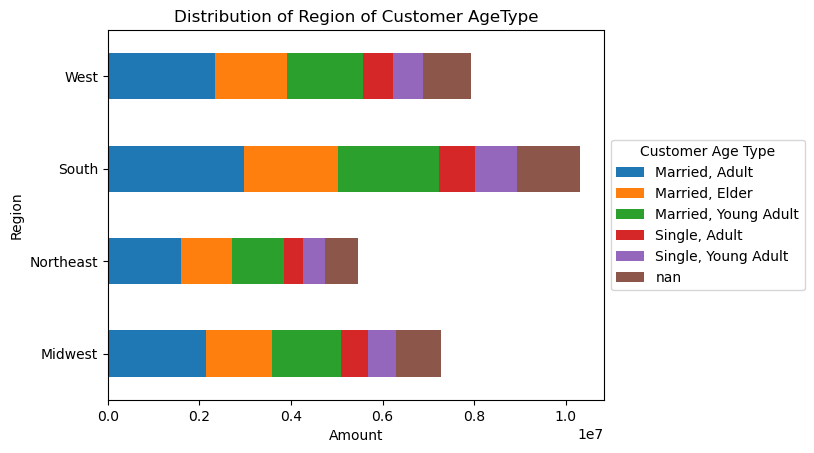

In [79]:
# Create stacked bar chart 

bar_region_customer_age_type = region_customer_age_type.plot.barh(stacked=True)

bar_region_customer_age_type.set(xlabel='Amount', ylabel='Region', title='Distribution of Region of Customer AgeType')
bar_region_customer_age_type.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Age Type')

In [80]:
bar_region_customer_family_type.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_customer_family_type.png'))

In [81]:
bar_region_customer_age_type.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_customer_age_type.png'))

## 9. Exporting Data

In [82]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30992664 entries, 0 to 32434207
Data columns (total 41 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   time_of_day             int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   _merge                  category
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  price_range_loc         object  
 15  busiest_day             object  
 16  Busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_spender         float64 
 21  spender_fla

In [83]:
df_all.shape

(30992664, 41)

In [84]:
# Export df_all as df_all_final

df_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_final.pkl'))